# Project: TMDb Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Movie Database (TMDb) is a popular community built database for movies and TV shows.

The goal of the project is to find out what successful movies have in common. Success can be measured in profit and in user ratings. So for this purpose, both profitability and popularity of movies will be analysed, answering the following questions:
- Is higher budget always associated with higher revenue?
- Which genres are associated with the highest profits per movie?
- Which genres are the most popular? And which ones are the most voted?
- Is the movie runtime associated with popularity?
- As a bonus, what are the most popular movies / actors / directors?

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling 

In [2]:
# load data with all columns dispayed
pd.set_option('display.max_columns', 25)
tmdb = pd.read_csv('tmdb-movies.csv')

### Inicial Data Exploration

In [3]:
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
tmdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
tmdb.shape

(10866, 21)

In [6]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
tmdb.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,9373,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,8804,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,woman director,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,134,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


The column `imdb_id` has 2 rows with the same value:

In [8]:
tmdb[tmdb['imdb_id'] == 'tt0411951']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
tmdb.duplicated().sum()

1

In [10]:
# find how many rows have 0 in budget_adj or in revenue_adj
zeros = tmdb[(tmdb['budget_adj'] == 0) | (tmdb['revenue_adj'] == 0)].shape
df_shape = tmdb.shape
percent = zeros[0] / df_shape[0] * 100
print(round(percent, 2), "% of all rows contain 0s in 'budget_adj' or 'revenue_adj' columns.")

64.52 % of all rows contain 0s in 'budget_adj' or 'revenue_adj' columns.


#### Observations from inicial data exploration:
- The dataset contains 21 columns but few of them do not seem useful for the purpose of the project. 
- There is one duplicated row.
- Less than half of columns have some missing values (with less than 25% of values are null). But one column (`homepage`) has higher amount of null data (≈75%) .
- The column names are clear and use Python's preferred snakecase. There is no need to change them.
- The final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. But almost 65% of rows contain `0` value in one of these two columns.
- Data types seem fine, except for:
    - `release_date` that can be changed to datetime object
    - `budget_adj` / `revenue_adj` should be changed to integers
- Columns `cast`, `genres`, `keywords`, `production_companies`, `director` contain multiple values separated by pipe (|) characters.

## Data Cleaning
### Part 1. Removing a Duplicate Row

In [11]:
before = tmdb.shape[0]
tmdb.drop_duplicates(keep='first', inplace=True)
after = tmdb.shape[0]

print(before - after, 'duplicated row was removed from the dataset.')

1 duplicated row was removed from the dataset.


### Part 2. Dropping Unnecessary Columns
Columns to drop:
- imdb_id / budget / revenue - there are other similar columns that will be used instead 
- homepage - has too many missing data and does not provide any valuable information
- tagline / keywords / overview - textual description that is hard to turn into useful a feature  
- production_companies - won't be used in the analyis

In [12]:
columns = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 
           'overview', 'production_companies']
tmdb.drop(columns=columns, axis=1, inplace=True)
tmdb.shape

(10865, 13)

### Part 3. Dealing with Missing Values
First of all, let's see how many missing values each column has and then investigate what is the best way to replace them:

In [13]:
tmdb.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
cols_with_nulls = ['cast', 'director','genres']
tmdb[cols_with_nulls].describe()

,cast,director,genres
count,10789,10821,10842
unique,10719,5067,2039
top,Louis C.K.,Woody Allen,Drama
freq,6,45,712


All missing data is located in text columns that have a lot of unique values and it makes impossible to guess a value based on frequency. Let's visualize missing values with seaborn heatmap:

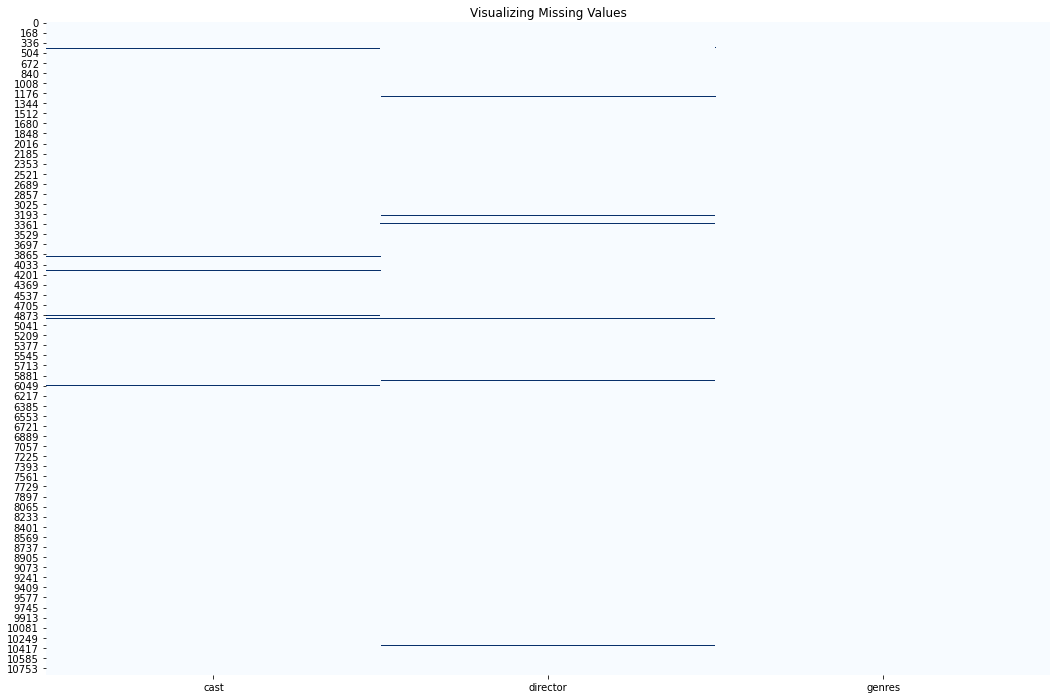

In [15]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(tmdb[cols_with_nulls].isnull(), cbar=False, cmap='Blues');

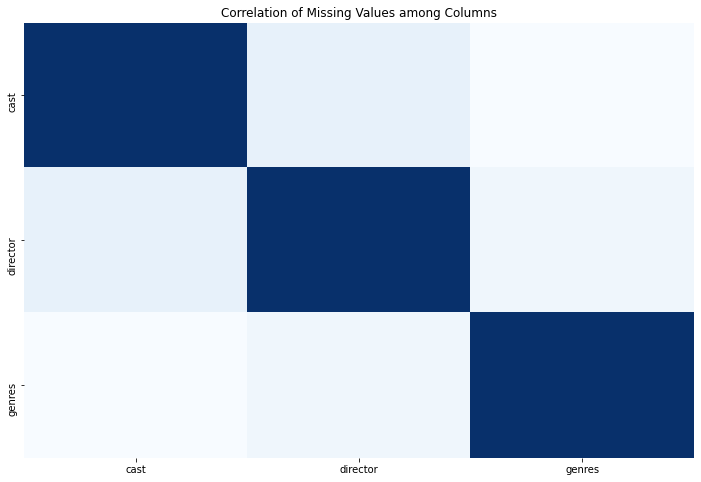

In [16]:
corr = tmdb[cols_with_nulls].isnull().corr()
plt.figure(figsize=(12,8))
plt.title("Correlation of Missing Values among Columns")
sns.heatmap(corr, cbar=False, cmap='Blues');

It looks like there is a weak correlation between missing values in columns 'director' and 'genres', as well as 'director' and 'cast'. And there is almost zero correlation between 'genres' and 'cast'. As the number of missing values is quite low, let's drop these rows:

In [17]:
before = tmdb.shape[0]
tmdb.dropna(axis=0, inplace=True)
after = tmdb.shape[0]

print(before - after, 'rows were removed from the dataset.')

134 rows were removed from the dataset.


Although, there is no null values left in the dataset, there are two columns containing a lot of 0s: `budget_adj` and `revenue_adj`. For the purpose of this project, I will remove these rows:

In [18]:
tmdb = tmdb[(tmdb['budget_adj'] > 0) & (tmdb['revenue_adj'] > 0)]
tmdb.shape

(3849, 13)

### Part 4. Data Type Convertion
Columns to convert:
- ***release_date*** to datetime 
- ***budget_adj*** to int
- ***revenue_adj*** to int

In [19]:
# convert dates to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

Before converting other two columns to integers, I will convert them from dollars to millions of dollars:

In [20]:
tmdb['budget_m'] = tmdb['budget_adj'] / 1000000
tmdb['revenue_m'] = tmdb['revenue_adj'] / 1000000

In [21]:
# round to the nearest integer and convert from floats to integers
tmdb['budget_m'] = round(tmdb['budget_m']).astype(int)
tmdb['revenue_m'] = round(tmdb['revenue_m']).astype(int)

tmdb[['budget_m', 'revenue_m']].head()

,budget_m,revenue_m
0,138,1392
1,138,348
2,101,272
3,184,1903
4,175,1386


In [22]:
# drop original columns
tmdb.drop(['budget_adj', 'revenue_adj'], axis=1, inplace=True)

### Part 5. Rounding `popularity` Column
For better visual perception, I will round ***popularity*** column to 2 decimal places:

In [23]:
tmdb['popularity'] = round(tmdb['popularity'], 2)
tmdb['popularity'][:5]

0    32.99
1    28.42
2    13.11
3    11.17
4     9.34
Name: popularity, dtype: float64

### Part 6. Dealing with `cast`, `genres` and `director` Columns
"Cast" and "Genres" contain multiple values separated by pipe (|) characters almost in all rows, while only a part of rows in "Director" column has multiple names.

In [24]:
tmdb[['cast', 'genres', 'director']].head()

,cast,genres,director
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,George Miller
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Robert Schwentke
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,James Wan


In [25]:
tmdb[tmdb['director'].str.contains('|', regex=False)][['director']].head()

,director
8,Kyle Balda|Pierre Coffin
11,Lana Wachowski|Lilly Wachowski
64,Glenn Ficarra|John Requa
85,John Francis Daley|Jonathan M. Goldstein
144,Duke Johnson|Charlie Kaufman


As all of the columns are ordered from the most important values to the least, let's deal with them in the following way:
- keep only first 3 names and first 3 genres of each row.
- split them up into 3 separate rows.
- removing rows with empty values in "cast" and "genres" (as not all movies have 3 or more values, it might produce null values in the second and third row)

In [26]:
# create three copies of the dataframe
df1 = tmdb.copy()  
df2 = tmdb.copy()  
df3 = tmdb.copy()

# all 3 dataframes are like this
df1.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_m,revenue_m
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,138,1392
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,138,348
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101,272
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,184,1903
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,175,1386


In [27]:
# columns to split by "|"
split_columns = ['cast', 'genres', 'director']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].str.split('|').str[0]
    df2[c] = df2[c].str.split('|').str[1]
    df3[c] = df3[c].str.split('|').str[2]
    
df1.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_m,revenue_m
0,135397,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,138,1392
1,76341,28.42,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,2015-05-13,6185,7.1,2015,138,348
2,262500,13.11,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,101,272
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,184,1903
4,168259,9.34,Furious 7,Vin Diesel,James Wan,137,Action,2015-04-01,2947,7.3,2015,175,1386


In [28]:
df2.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_m,revenue_m
0,135397,32.99,Jurassic World,Bryce Dallas Howard,NaN,124,Adventure,2015-06-09,5562,6.5,2015,138,1392
1,76341,28.42,Mad Max: Fury Road,Charlize Theron,NaN,120,Adventure,2015-05-13,6185,7.1,2015,138,348
2,262500,13.11,Insurgent,Theo James,NaN,119,Science Fiction,2015-03-18,2480,6.3,2015,101,272
3,140607,11.17,Star Wars: The Force Awakens,Mark Hamill,NaN,136,Adventure,2015-12-15,5292,7.5,2015,184,1903
4,168259,9.34,Furious 7,Paul Walker,NaN,137,Crime,2015-04-01,2947,7.3,2015,175,1386


In [29]:
# replace missing values in second and third dataframes with values from the first dataframe
# it will create duplicated rows but I will drop them later
df2 = df2.combine_first(df1)
df3 = df3.combine_first(df1)

print("Now, all dataframes have 0 null values:", 
      df1['director'].isnull().sum() == df2['director'].isnull().sum() == df1['director'].isnull().sum() == 0)

Now, all dataframes have 0 null values: True


In [30]:
# combine all 3 datasets in 1
tmdb_new = pd.concat([df1, df2, df3], axis=0)
tmdb_new.shape

(11547, 13)

In [31]:
# delete duplicates
tmdb_new.drop_duplicates(keep='first', inplace=True)
tmdb_new.shape

(11543, 13)

In [32]:
# sort dataframe by 'id' column and print first 15 rows
tmdb_new = tmdb_new.sort_values(by=['id'], ignore_index=True)
tmdb_new.head(15)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_m,revenue_m
0,5,1.23,Four Rooms,Jennifer Beals,Robert Rodriguez,98,Comedy,1995-12-25,293,6.4,1995,6,6
1,5,1.23,Four Rooms,Antonio Banderas,Alexandre Rockwell,98,Comedy,1995-12-25,293,6.4,1995,6,6
2,5,1.23,Four Rooms,Tim Roth,Allison Anders,98,Comedy,1995-12-25,293,6.4,1995,6,6
3,11,12.04,Star Wars,Harrison Ford,George Lucas,121,Action,1977-03-20,4428,7.9,1977,40,2790
4,11,12.04,Star Wars,Carrie Fisher,George Lucas,121,Science Fiction,1977-03-20,4428,7.9,1977,40,2790
5,11,12.04,Star Wars,Mark Hamill,George Lucas,121,Adventure,1977-03-20,4428,7.9,1977,40,2790
6,12,3.44,Finding Nemo,Albert Brooks,Andrew Stanton,100,Animation,2003-05-30,3692,7.4,2003,111,1025
7,12,3.44,Finding Nemo,Ellen DeGeneres,Lee Unkrich,100,Family,2003-05-30,3692,7.4,2003,111,1025
8,12,3.44,Finding Nemo,Alexander Gould,Andrew Stanton,100,Animation,2003-05-30,3692,7.4,2003,111,1025
9,13,6.72,Forrest Gump,Gary Sinise,Robert Zemeckis,142,Romance,1994-07-06,4856,8.1,1994,81,997


<a id='eda'></a>
## Exploratory Data Analysis
### Is higher budget always associated with higher revenue?

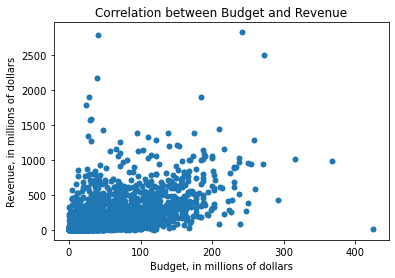

In [33]:
# create a scatter plot 
tmdb_new.plot(x='budget_m', y='revenue_m', kind='scatter')
plt.title("Correlation between Budget and Revenue")
plt.xlabel("Budget, in millions of dollars")
plt.ylabel("Revenue, in millions of dollars");

There are few outliers. Zooming (by limiting `x` and `y` axis) can help to see the tendency more clear.

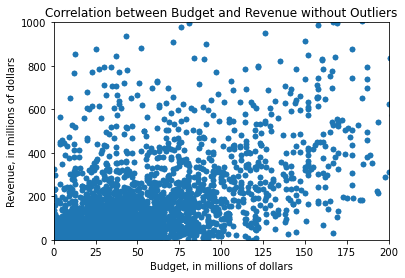

In [34]:
tmdb_new.plot(x='budget_m', y='revenue_m', kind='scatter', xlim=(0,200), ylim=(0,1000))
plt.title("Correlation between Budget and Revenue without Outliers")
plt.xlabel("Budget, in millions of dollars")
plt.ylabel("Revenue, in millions of dollars");

It looks like there is a weak positive correlation. To be sure, let's count the Pearson's correlation coefficient:

In [35]:
tmdb_new[['budget_m','revenue_m']].corr()

,budget_m,revenue_m
budget_m,1.000000,0.570101
revenue_m,0.570101,1.000000


Pearson's correlation coefficient is about 0.57 and it shows moderate correlation, which means that 57% of revenues of movies can be predicted from the relationship between budgets and revenues. So answering the question, higher budget is not always associated with higher revenue but we can observe moderate correlation between these 2 variables.

### Which genres are associated with the highest profits per movie?

In [36]:
# create a profit column
tmdb_new['profit_m'] = tmdb_new['revenue_m'] - tmdb_new['budget_m']

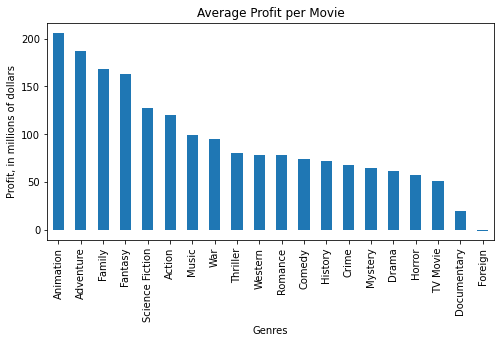

In [37]:
# group by genres and count average profit per movie of each genre
genre_profit = tmdb_new.groupby('genres').profit_m.mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
genre_profit.plot(kind='bar')
plt.title("Average Profit per Movie")
plt.xlabel("Genres")
plt.ylabel("Profit, in millions of dollars");

The most profitable genres (with profits more than $150 million per movie) are:
- Animation 
- Adventure
- Family 
- Fantasy

As well, there are 2 other genres with high profits ($100-150M):
- Action 
- Science Fiction

While the least profitable are:
- Documentary
- Foreign

### Which genres are the most popular?
Popularity on TMDb is a cumulative metric, which is based on:
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

Let's see which genres are the most popular.

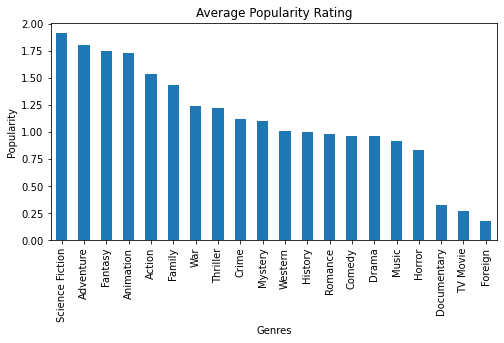

In [38]:
# group by genres, count average popularity per genre, sort from highest values to lowest
genre_popularity = tmdb_new.groupby('genres').popularity.mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
genre_popularity.plot(kind='bar')
plt.title("Average Popularity Rating")
plt.xlabel("Genres")
plt.ylabel("Popularity");

The most popular genres are the same as the most profitable (although in a slightly different order): 
- Science Fiction
- Adventure
- Fantasy
- Animation
- Action 
- Family

While the most unpopular are:
- Documentary
- TV Movie
- Foreign

### And which genres are the most voted?
How many people watched and voted for a movie is a part of popularity variable, but it is interesting to see how different (or similar) the results will be.

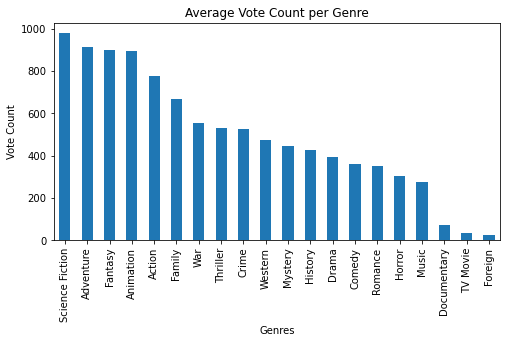

In [39]:
# group by genres, count average vore count per genre, sort from highest values to lowest
genre_votes = tmdb_new.groupby('genres').vote_count.mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
genre_votes.plot(kind='bar')
plt.title("Average Vote Count per Genre")
plt.xlabel("Genres")
plt.ylabel("Vote Count");

We see that the situation is exactly the same as with popularity. The most voted genres are:
- Science Fiction
- Adventure
- Fantasy
- Animation
- Action 
- Family

And the least voted are:
- Documentary
- TV Movie
- Foreign

### Is a movie runtime associated with popularity?

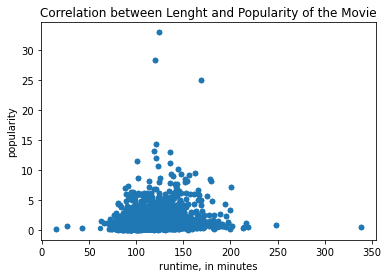

In [40]:
tmdb_new.plot(x='runtime', y='popularity', kind='scatter')
plt.title("Correlation between Lenght and Popularity of the Movie")
plt.xlabel("runtime, in minutes");

Based on the scatterplot, we can see that the movies that have duration less than 1 hour and more than 3 hour tend to be unpopular. While the most popular runtime is about 2 hours.

### Bonus: What are the most popular movies / actors / directors?

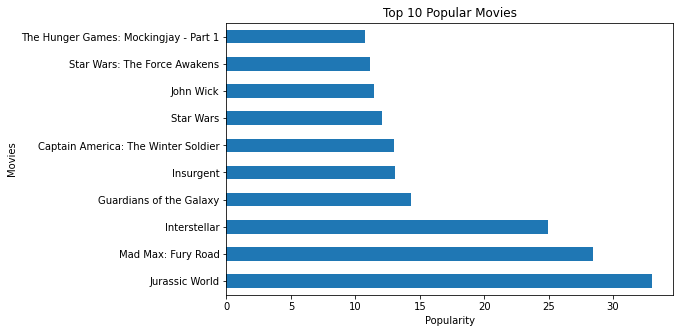

In [41]:
# top popular movies
popular_movies = tmdb_new.groupby('original_title').popularity.max().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,5))
popular_movies.plot(kind='barh')
plt.title("Top 10 Popular Movies")
plt.xlabel("Popularity")
plt.ylabel("Movies");

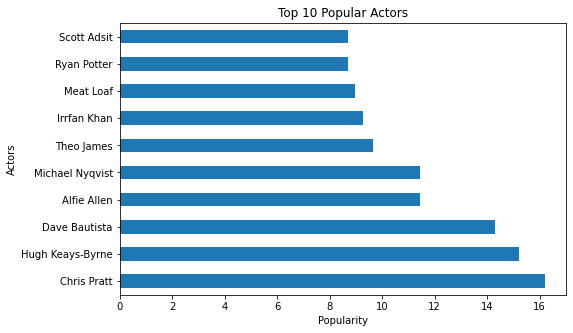

In [42]:
# top 10 actors are chosen based on average rating per actor
cast_popularity = tmdb_new.groupby('cast').popularity.mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,5))
cast_popularity.plot(kind='barh')
plt.title("Top 10 Popular Actors")
plt.xlabel("Popularity")
plt.ylabel("Actors");

Not surprisingly, popular actors are the ones who played main roles in the most popular movies. For example, Chris Pratt was in the movies "Jurassic World" and "Guardians of the Galaxy". Hugh Keays-Byrne played a role in "Mad Max: Fury Road".

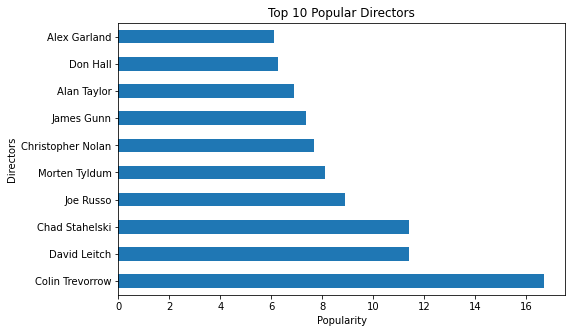

In [43]:
# top 10 directors are chosen based on average rating per director
director_popularity = tmdb_new.groupby('director').popularity.mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,5))
director_popularity.plot(kind='barh')
plt.title("Top 10 Popular Directors")
plt.xlabel("Popularity")
plt.ylabel("Directors");

The same happens with the directors: 
- Colin Trevorrow takes the first place for the movie "Jurassic World".
- David Leitch and Chad Stahelski take second and third places for the movie "John Wick"
- Joe Russo - for "Capitan America: The Winter Soldier"
- etc.

The issue with these ratings is that they depend a lot on which movies are represented in the dataframe. One or two movies with low popularity can significately pull down the average popularity of a director or an actor. Conversely, having one single movie with high popularity will pull an actor or director to the top. So, we cannot say for sure, which ones are more popular.

<a id='conclusions'></a>
## Conclusions
### In the Data Wranging part of the project:
I removed:
- unnecessary columns
- duplicated rows
- rows with missing values

Dealing with missing data could be done in a different way. For example, I could replace null values with the most frequent ones but columns had multiple unique values and I didn't want to jeopardize investigation. As well, I was thinking to remove columns 'budget_adj' and 'revenue_adj', instead of removing 65% of rows with zero values. But the analysis was going to be based on these columns so I had to keep them sacrificing part of the rows.

For convenince purposes, I converted few columns to different data types and rounded where it was necessary.

To deal with the columns containing multiple values separated by pipe (|) characters, I split the first 3 values into 3 rows. 

### The questions and conclusions made in the Exploratory Data Analysis:
#### Is higher budget always associated with higher revenue?
Using scatter plots and Pearson's correlation coefficient I came to a conclusion that higher budget is not always associated with higher revenue but we can observe moderate correlation between these 2 variables.

#### Which genres are associated with the highest profits per movie? Which genres are the most popular? And which ones are the most voted?
Using `group by` method and bar plots, I found out that the most popular and the most voted genres are:
- Science Fiction
- Adventure
- Fantasy
- Animation
- Action
- Family

The order is very similar for the most profitable genres: 
- Animation
- Adventure
- Family
- Fantasy
- Action
- Science Fiction

But as we see, Science Fiction takes the first place in popularity but sixth in profitability, while Family movies take third place in profitability but sixth in popularity. It can be explained by high expences for production of Science Fiction movies and comparely low expences for Family movies.

The least popular and least profitable genres are:
- Documentary
- TV Movie
- Foreign

#### Is the movie runtime associated with popularity?
Based on the scatterplot, we saw that the movies with the duration of less than 1 hour and more than 3 hour tend to be unpopular. While the most popular runtime is about 2 hours.

#### What are the most popular movies / actors / directors?
Top 10 popular movies on TMDb are:
- Jurassic World                        
- Mad Max: Fury Road                       
- Interstellar                             
- Guardians of the Galaxy                  
- Insurgent                                
- Captain America: The Winter Soldier      
- Star Wars                                
- John Wick                                
- Star Wars: The Force Awakens             
- The Hunger Games: Mockingjay - Part 1

But I could not determine the most popular actors and director because they depend a lot on which movies are represented in the dataframe. The cleaned dataframe consisted of around 3800 movies, that's around 1-3 movies per director (and similarly for actors). It means that one movie with low popularity can significately pull down the average popularity of a director or an actor. Conversely, having just one single movie in the dataframe with high popularity will pull an actor or a director to the top. So, we cannot say for sure, which ones are more popular.